In [57]:
import pandas as pd

In [58]:
df=pd.read_csv("spam.csv")

In [59]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [60]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X=df.Message

In [64]:
y=df.Category

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [67]:
y_train[0]

'ham'

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
vectorizer=CountVectorizer()

In [70]:
X_train_count=vectorizer.fit_transform(X_train)
X_train_count

<4457x7701 sparse matrix of type '<class 'numpy.int64'>'
	with 59275 stored elements in Compressed Sparse Row format>

In [71]:
len(X_train_count.toarray()[0])

7701

In [72]:
X_test_count=vectorizer.transform(X_test)
X_test_count

<1115x7701 sparse matrix of type '<class 'numpy.int64'>'
	with 13741 stored elements in Compressed Sparse Row format>

In [73]:
len(X_test_count.toarray()[0])

7701

In [74]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
model=MultinomialNB()

In [76]:
model.fit(X_train_count,y_train)

MultinomialNB()

In [77]:
y_pred = model.predict(X_test_count)

In [78]:
model.score(X_test_count,y_test)

0.9919282511210762

In [79]:
from sklearn.metrics import classification_report

In [80]:
report=classification_report(y_test,y_pred)

In [81]:
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
cm=confusion_matrix(y_pred,y_test)

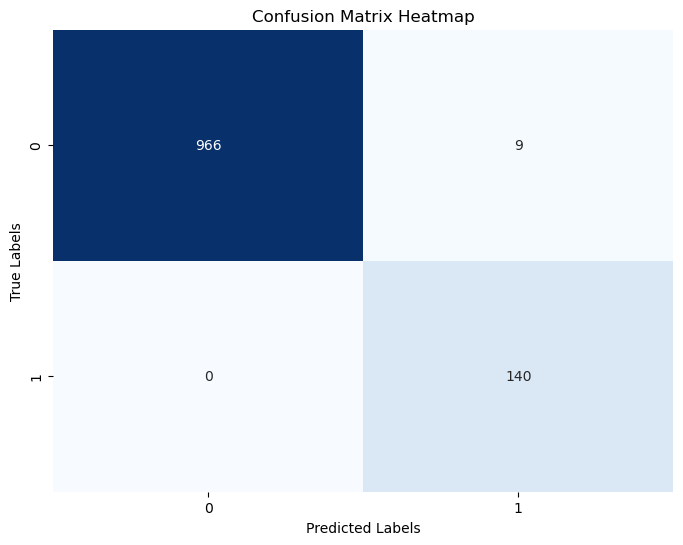

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [95]:
Emails=[
"""Subject: Your Invoice for September 2024

Hi Peter,

We hope you’re doing well! Please find attached your invoice for the services provided in September 2024.

If you have any questions or require further assistance, feel free to reply to this email or contact our billing department at billing@example.com.

Thank you for your continued trust in us!

Best regards,
The Billing Team
Phone: (123) 456-7890""" ,
    
 
"""Subject: Urgent! Your Account is Compromised, Take Immediate Action!!!

Dear User,

We have detected suspicious activity on your account and it has been locked for security reasons. You must act NOW to avoid further issues!

Click this link to restore your account:
 Secure Your Account NOW!!!

Failure to act IMMEDIATELY will result in permanent loss of access and all your data! Our team is ready to assist you, but you MUST take this step first.

DO NOT IGNORE THIS EMAIL!

Sincerely,
Account Security Team
Phone: N/A
Support: urgent-support@example.com    """
    
    
    
    
    
    
]

In [96]:
Emails_count = vectorizer.transform(Emails)

In [97]:
model.predict(Emails_count)

array(['ham', 'spam'], dtype='<U4')

In [98]:
model.predict_proba(Emails_count)

array([[8.93053347e-01, 1.06946653e-01],
       [1.47411920e-04, 9.99852588e-01]])

In [99]:
from sklearn.pipeline import Pipeline

In [101]:
pipe=Pipeline([
    
    ("Count_vectorizer",CountVectorizer()),
    ("model",MultinomialNB())
    
])

In [102]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Count_vectorizer', CountVectorizer()),
                ('model', MultinomialNB())])

In [103]:
y_pred_pipe=pipe.predict(X_test)

In [104]:
report_pipe=classification_report(y_test,y_pred_pipe)

In [105]:
print(report_pipe)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

